In [24]:
# Uncomment below if you want to run this file only
%run main.ipynb
#%run data_cleaning.ipynb
#%run data_visualization.ipynb
#%run feature_engineering.ipynb

In [25]:
if s3_utils.check_file_exists(output_file_key_data_feature_engineering):
    dataset = s3_utils.read_csv_from_s3(output_file_key_data_feature_engineering)

In [26]:
X = dataset.drop(columns=['target'])
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert the imputed data back to a DataFrame
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [28]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(0, 0)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_train)

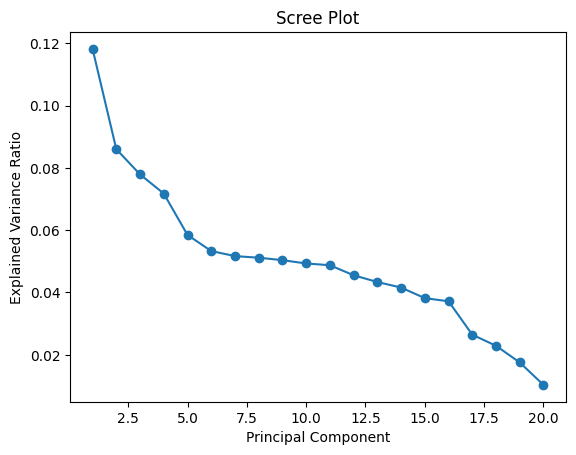

In [48]:
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [46]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_sum = explained_variance_ratio.sum()
pca.explained_variance_ratio_, explained_variance_ratio_sum

(array([0.1181829 , 0.08600148, 0.077908  , 0.07175636, 0.05846808,
        0.05331386, 0.05167734, 0.05116835, 0.05037991, 0.04931507,
        0.04875619, 0.04553183, 0.04336359, 0.04158536, 0.03818635]),
 0.8855946621108192)

In [51]:
pca_results = pd.DataFrame(X_train_pca)
pca_results.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.705630,1.221034,0.348018,-0.144081,-0.594426,-1.236738,-1.593167,1.389859,0.315745,-3.103819,1.326440,0.373667,-1.436969,1.634207,-0.268560
1,-1.710452,-1.624662,-0.455118,1.449095,1.232285,2.626040,2.529621,4.970116,6.412263,-3.968621,-5.678067,-1.005208,-2.245341,0.092340,-0.035001
2,0.960112,2.117131,0.025129,2.718855,1.065584,0.522846,-0.084176,2.120488,-1.157365,-3.403548,0.920804,1.986490,-2.032058,0.804294,-1.288314
3,-1.092399,0.888213,1.189470,-0.083851,-0.770229,-0.046279,-0.201923,0.068409,0.082765,0.184797,-0.257732,1.009257,-0.555100,0.797533,0.068869
4,2.808157,0.906107,1.949098,2.619325,-0.569161,0.275947,0.027379,-0.446300,0.838117,0.119092,0.431792,0.710748,0.334318,-0.060205,-0.240398


In [52]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

y_pred = rf_classifier.predict(X_test_pca)

In [54]:
# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.3875
Recall: 0.01430054203667397
F1 Score: 0.027583138694249807
ROC AUC: 0.5061491063982688


In [ ]:
df.to_csv('reduced_pca_dataset.csv', index=False)